Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between the dependent and independent variables, they are considering and the number of independent variables being used. This article is going to demonstrate how to use the various Python libraries to implement linear regression on a given dataset. We will demonstrate a binary linear model as this will be easier to visualize. In this demonstration, the model will use Gradient Descent to learn. You can learn about it here.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('bottle.csv')
df_binary = df[['Salnty', 'T_degC']]

# Taking only the selected two attributes from the dataset
df_binary.columns = ['Sal', 'Temp']
#display the first 5 rows
df_binary.head()


,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


Step 3: Exploring the data scatter

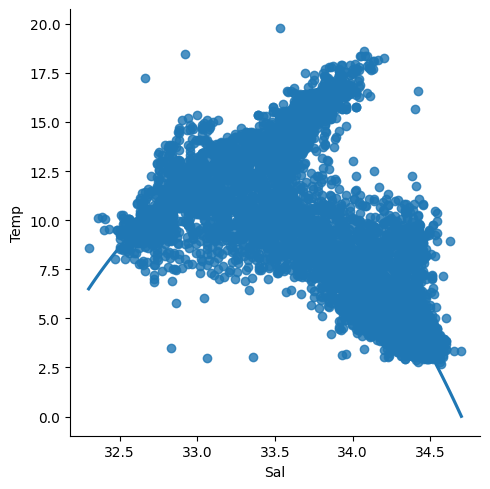

In [3]:
#plotting the Scatter plot to check relationship between Sal and Temp
sns.lmplot(x ="Sal", y ="Temp", data = df_binary, order = 2, ci = None)
plt.show()


Step 4: Data cleaning

In [4]:
# Eliminating NaN or missing input numbers
df_binary.fillna(method ='ffill', inplace = True)


<ipython-input-4-fe81e81b8df7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method ='ffill', inplace = True)


 Step 5: Training our model

In [5]:
X = np.array(df_binary['Sal']).reshape(-1, 1)
y = np.array(df_binary['Temp']).reshape(-1, 1)

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
df_binary.dropna(inplace = True)

# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.40444350971803145


<ipython-input-5-d7746d681eca>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace = True)


Step 6: Exploring our results

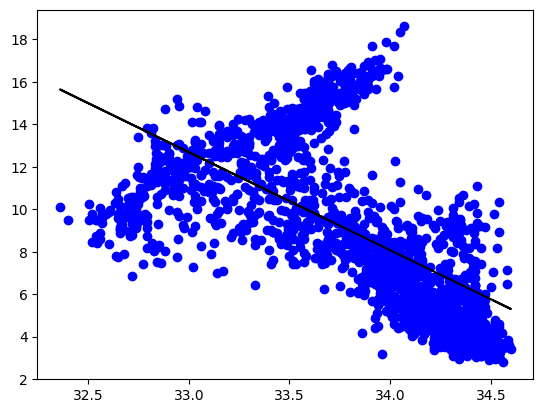

In [6]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()
# Data scatter of predicted values


The low accuracy score of our model suggests that our regressive model has not fit very well with the existing data. This suggests that our data is not suitable for linear regression. But sometimes, a dataset may accept a linear regressor if we consider only a part of it. Let us check for that possibility.   


Step 7: Working with a smaller dataset

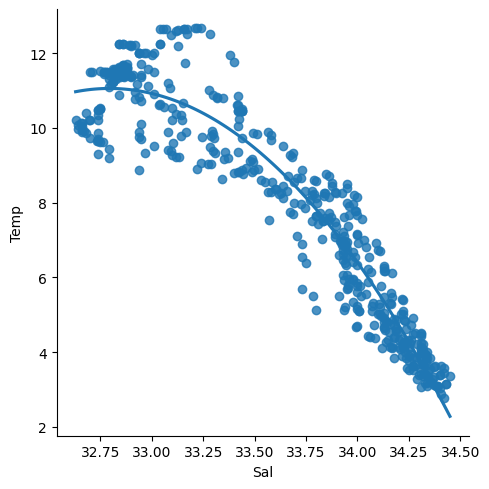

In [7]:
df_binary500 = df_binary[:][:500]

# Selecting the 1st 500 rows of the data
sns.lmplot(x ="Sal", y ="Temp", data = df_binary500,
							order = 2, ci = None)


We can already see that the first 500 rows follow a linear model. Continuing with the same steps as before.

In [8]:
df_binary500.fillna(method ='fill', inplace = True)

X = np.array(df_binary500['Sal']).reshape(-1, 1)
y = np.array(df_binary500['Temp']).reshape(-1, 1)

df_binary500.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got fill

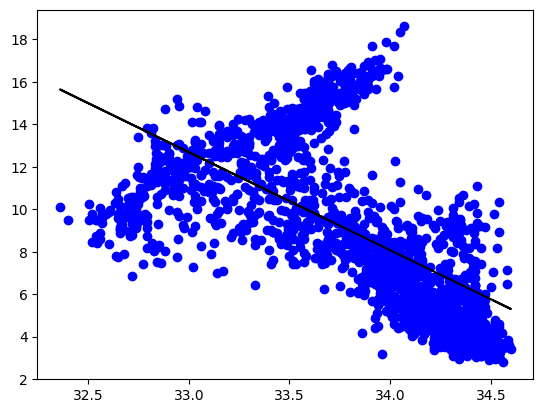

In [9]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()


Step 8: Evaluation Metrics For Regression



At last, we check the performance of the Linear Regression model with help of evaluation metrics. For Regression algorithms we widely use mean_absolute_error, and mean_squared_error metrics to check the model performance

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


MAE: 2.3519097333069716
MSE: 8.847405137605804
RMSE: 2.9744587974295094


Linear Regression using PyTorch